## Problem 1: Creating basic geometries (3 Points)

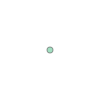

In [1]:
from shapely.geometry import Point

def createPointGeom(x_coord, y_coord):
    new_point = Point(x_coord, y_coord)
    return new_point

point1 = createPointGeom(2.2, 4.2)

point2 = createPointGeom(7.2, -25.1)

point3 = createPointGeom(9.26, -2.456)

point1

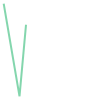

In [2]:
from shapely.geometry import LineString

def createLineGeom(points_list):
    checked_points = []
    for p in points_list:
        if isinstance(p, Point):
            checked_points.append(p)
        else:
            print("point {} is not a Point object".format(str(p)))
    if len(checked_points) >= 2:
        new_line = LineString(checked_points)
        return new_line
    else:
        print("not enough points in input list to create line")
        return None

list_of_points = [point1, point2, point3]

line1 = createLineGeom(list_of_points)

line_coords = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]
created_points = []
for tup in line_coords:
    point = createPointGeom(tup[0], tup[1])
    created_points.append(point)

line2 = createLineGeom(created_points)
line2

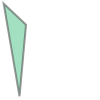

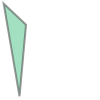

In [3]:
from shapely.geometry import Polygon

def createPolyGeom(input_list):
    p_coord_list = []
    for elem in input_list:
        if isinstance(elem, Point):
            p_coord_list.append( (elem.x, elem.y) )
        elif isinstance(elem, tuple):
            p_coord_list.append( (elem[0], elem[1]) )
        else:
            print("elem {} is not Point or Tuple object".format(str(elem)))
    if len(p_coord_list) >= 3:
        new_poly = Polygon(p_coord_list)
        return new_poly
    else:
        print("not enough points in input list to create polygon")
        return None

coord_list = [(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

poly1 = createPolyGeom(coord_list)

list_of_points = [point1, point2, point3]

poly2 = createPolyGeom(list_of_points)

display(poly1)
display(poly2)

## Problem 2: Attributes of geometries (3 Points)

In [4]:
def getCentroid(geom):
    return geom.centroid

point1_centroid = getCentroid(point1)
line1_centroid = getCentroid(line1)
poly2_centroid = getCentroid(poly2)

print(line1_centroid)

POINT (6.229961354035622 -11.89241115757239)


In [5]:
def getArea(test_poly):
    if isinstance(test_poly, Polygon):
        return test_poly.area
    else:
        print("error, is not a Polygon")

poly1_area = getArea(poly1)
print(poly1_area)


86.78900000000002


In [6]:
def getLength(geom):
    if isinstance(geom, LineString) or isinstance(geom, Polygon):
        return geom.length
    else:
        print("Error: LineString or Polygon geometries required!")

point1_length = getLength(point1)
line1_length = getLength(line1)
poly2_length = getLength(poly2)
poly2_length

Error: LineString or Polygon geometries required!


62.16395199996553

## Problem 3: Reading coordinates from a file and creating a geometries (4 Points)

In [7]:
import pandas as pd


df = pd.read_csv('travelTimes_2015_Helsinki.txt', sep=';', encoding='latin1')
pd.set_option('max_columns',20)
display(df.head(5))

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0


In [8]:
def make_orig_location(row):
    return Point(row['from_x'], row['from_y'])

# Go through every row, and make a point out of its lat and lon
df['orig_points'] = df.apply(make_orig_location, axis=1)

display(df.head(5))

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines,orig_points
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0,POINT (24.9704379 60.3119173)
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0,POINT (24.9704379 60.3119173)
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0,POINT (24.9704379 60.3119173)
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0,POINT (24.9704379 60.3119173)
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0,POINT (24.9704379 60.3119173)


In [9]:
def make_dest_location(row):
    return Point(row['to_x'], row['to_y'])

# Go through every row, and make a point out of its lat and lon
df['dest_points'] = df.apply(make_dest_location, axis=1)

display(df.head(5))

,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines,orig_points,dest_points
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0,POINT (24.9704379 60.3119173),POINT (24.8560344 60.3999406)
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0,POINT (24.9704379 60.3119173),POINT (24.8605682 60.4000135)
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0,POINT (24.9704379 60.3119173),POINT (24.865102 60.4000863)
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8696358 60.4001589)
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8425817 60.39747779999999)


In [10]:
def make_lines(row):
    point_list = [row['orig_points'], row['dest_points']]
    return LineString(point_list)

df['lines'] = df.apply(make_lines, axis=1)

display(df.head(5))



,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines,orig_points,dest_points,lines
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0,POINT (24.9704379 60.3119173),POINT (24.8560344 60.3999406),"LINESTRING (24.9704379 60.3119173, 24.8560344 ..."
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0,POINT (24.9704379 60.3119173),POINT (24.8605682 60.4000135),"LINESTRING (24.9704379 60.3119173, 24.8605682 ..."
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0,POINT (24.9704379 60.3119173),POINT (24.865102 60.4000863),"LINESTRING (24.9704379 60.3119173, 24.865102 6..."
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8696358 60.4001589),"LINESTRING (24.9704379 60.3119173, 24.8696358 ..."
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8425817 60.39747779999999),"LINESTRING (24.9704379 60.3119173, 24.8425817 ..."


In [11]:
def calc_all_lengths(row):
    line = row['lines']
    return line.length

df['lengths'] = df.apply(calc_all_lengths, axis=1)

display(df.head(5))



,from_id,to_id,fromid_toid,route_number,at,from_x,from_y,to_x,to_y,total_route_time,route_time,route_distance,route_total_lines,orig_points,dest_points,lines,lengths
0,5861326,5785640,5861326_5785640,1,08:10,24.970438,60.311917,24.856034,60.399941,125.0,99.0,22917.6,2.0,POINT (24.9704379 60.3119173),POINT (24.8560344 60.3999406),"LINESTRING (24.9704379 60.3119173, 24.8560344 ...",0.144348
1,5861326,5785641,5861326_5785641,1,08:10,24.970438,60.311917,24.860568,60.400014,123.0,102.0,23123.5,2.0,POINT (24.9704379 60.3119173),POINT (24.8605682 60.4000135),"LINESTRING (24.9704379 60.3119173, 24.8605682 ...",0.140827
2,5861326,5785642,5861326_5785642,1,08:10,24.970438,60.311917,24.865102,60.400086,125.0,103.0,23241.3,2.0,POINT (24.9704379 60.3119173),POINT (24.865102 60.4000863),"LINESTRING (24.9704379 60.3119173, 24.865102 6...",0.137366
3,5861326,5785643,5861326_5785643,1,08:10,24.970438,60.311917,24.869636,60.400159,129.0,107.0,23534.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8696358 60.4001589),"LINESTRING (24.9704379 60.3119173, 24.8696358 ...",0.133969
4,5861326,5787544,5861326_5787544,1,08:10,24.970438,60.311917,24.842582,60.397478,118.0,92.0,22428.2,2.0,POINT (24.9704379 60.3119173),POINT (24.8425817 60.39747779999999),"LINESTRING (24.9704379 60.3119173, 24.8425817 ...",0.153843


In [12]:
print(df['lengths'].mean())


0.2150222482322721
